In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [12]:
#Using iris dataset for bagging from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

# Add target column
df['Species'] = iris.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df=df.iloc[:,1:] # all rows ...all columns except col first i.e id col ...removing id column

# Converting species satosa,versicolor etc into digits  
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])
df.head()


,sepal width (cm),petal length (cm),petal width (cm),Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [16]:
# Taking only two columns sepalwidth and petallength making it a binary classification problem 
df = df[df ['Species' ] != 0][ ['sepal width (cm)', 'petal length (cm)' ,'Species' ]]

In [17]:
df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [19]:
# Main task starts
df=df.sample(100) # shuffling  100 points in random order 
df_train=df.iloc[:60,:].sample(10) # first 60 rows me se 10 random rows lelo
df_val=df.iloc[60:80,:].sample(5)  # 60 se 80 rows tk me se 5 random rows lelo 
df_test=df.iloc[80:,:].sample(5)  # after 80 take 5 random rows 


In [20]:
df_train.head()

,sepal width (cm),petal length (cm),Species
93,2.3,3.3,1
97,2.9,4.3,1
86,3.1,4.7,1
102,3.0,5.9,2
114,2.8,5.1,2


In [21]:
df_val.head()

,sepal width (cm),petal length (cm),Species
137,3.1,5.5,2
127,3.0,4.9,2
63,2.9,4.7,1
65,3.1,4.4,1
60,2.0,3.5,1


In [22]:
df_test.head()

,sepal width (cm),petal length (cm),Species
140,3.1,5.6,2
99,2.8,4.1,1
115,3.2,5.3,2
126,2.8,4.8,2
133,2.8,5.1,2


In [ ]:
X_test=df_val.iloc[:,0:2].values   # array 
y_test=df_val.iloc[:,-1].values   # array 

In [ ]:
##################### Bagging 

# Going to take three models all will be decision tree model 
#  we have a dataset including 10 rows  jispe training krenge 
#  all three decision trees will be getting 80% percent of total data each having 8 rows 

# Data for Tree 1
df_bag = df_train.sample(8,replace=True) # get 8 rows   ..replace = True means sampling with replacement 
X = df_bag.iloc[ :, 0:2]
y = df_bag. iloc[ :, -1]

df_bag

,sepal width (cm),petal length (cm),Species
96,2.9,4.2,1
86,3.1,4.7,1
109,3.6,6.1,2
97,2.9,4.3,1
144,3.3,5.7,2
93,2.3,3.3,1
109,3.6,6.1,2
114,2.8,5.1,2


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

dt_bag1 = DecisionTreeClassifier()  # first DT(Decision Tree) object 


In [25]:
def evaluate(clf, X,y):    
    clf.fit(X,y)
    plot_tree(clf) 
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

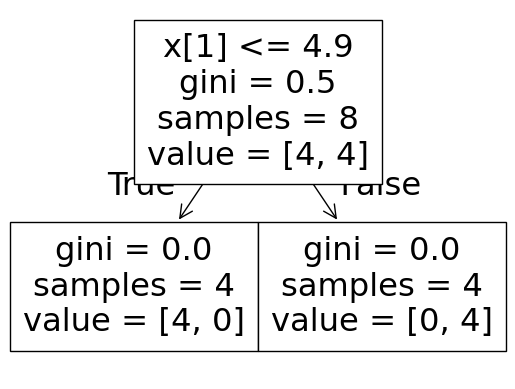

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NameError: name 'X_test' is not defined

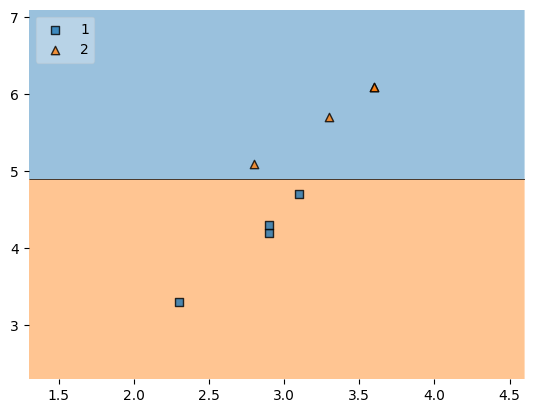

In [26]:
evaluate(dt_bag1,X,y)

In [27]:
# repeating same procedure for rest 2 models

# Data for Tree 2
df_bag = df_train.sample(8,replace=True) # get 8 rows   ..replace = True means sampling with replacement 
X = df_bag.iloc[ :, 0:2]
y = df_bag. iloc[ :, -1]

df_bag

,sepal width (cm),petal length (cm),Species
109,3.6,6.1,2
93,2.3,3.3,1
109,3.6,6.1,2
97,2.9,4.3,1
96,2.9,4.2,1
97,2.9,4.3,1
97,2.9,4.3,1
96,2.9,4.2,1


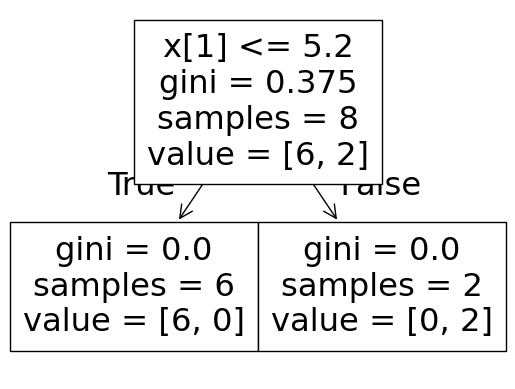

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NameError: name 'X_test' is not defined

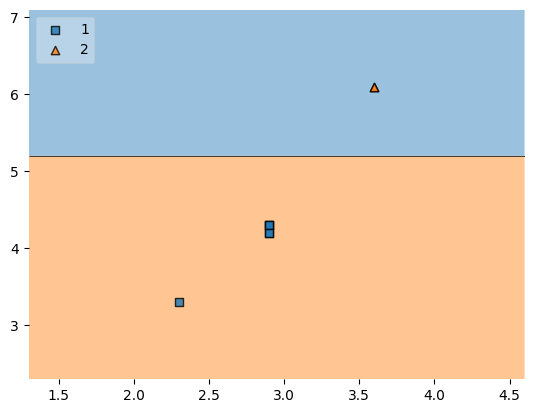

In [28]:
dt_bag2=DecisionTreeClassifier() # object for DT 2 
evaluate(dt_bag2,X,y)

In [29]:
# Again doing same thing creating sample for 3rd model 
df_bag = df_train.sample(8,replace=True) # get 8 rows   ..replace = True means sampling with replacement 
X = df_bag.iloc[ :, 0:2]
y = df_bag. iloc[ :, -1]

df_bag

,sepal width (cm),petal length (cm),Species
109,3.6,6.1,2
114,2.8,5.1,2
102,3.0,5.9,2
102,3.0,5.9,2
109,3.6,6.1,2
97,2.9,4.3,1
97,2.9,4.3,1
113,2.5,5.0,2


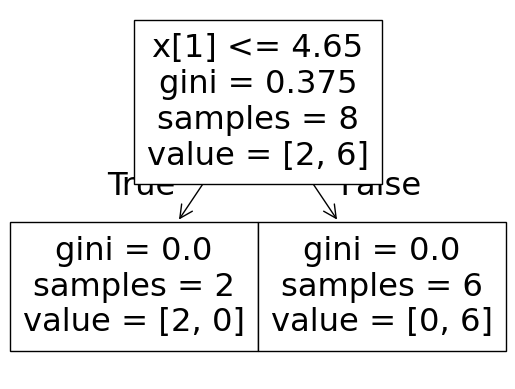

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NameError: name 'X_test' is not defined

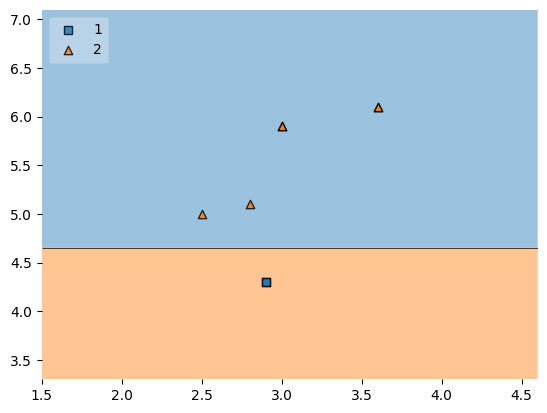

In [30]:
dt_bag3=DecisionTreeClassifier() # object for DT 2 
evaluate(dt_bag3,X,y)

In [31]:
######### Prediction 

df_test

,sepal width (cm),petal length (cm),Species
140,3.1,5.6,2
99,2.8,4.1,1
115,3.2,5.3,2
126,2.8,4.8,2
133,2.8,5.1,2


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([3.1,5.6]).reshape(1,2)))  # giving same query point to all three models
print("Predictor 2",dt_bag2.predict(np.array([3.1,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# as we can see all three models giving same result .....i.e class is 2 